In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

file_name="Данные для исследований.xlsx"
data = 'Дата замера'
hole = 'Скважина'
x1 = 'Способ эксплуатации'
x2 = 'Режим'
X = (x1, x2)
y1 = 'Рпр(ТМ)'
y2 = 'Рзаб(Рпр)'
y3 = 'Рзаб(Нд)'
y4 = 'Рзаб(иссл)'
Y = (y1, y2, y3, y4)

In [30]:
xls = pd.ExcelFile(file_name)

def read_all_sheets(excel_file):
    df = pd.DataFrame()
    for list_excel in excel_file.sheet_names:
        df = df.append(pd.read_excel(excel_file,
                                    list_excel,
                                    parse_dates=[data],
                                    index_col = data))
    return df

df = read_all_sheets(xls)
df.sort_index(inplace = True)

F:\Anaconda\envs\foo\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [34]:
all_data = df.copy()[[hole, x1, x2, y1, y2, y3, y4]]

In [35]:
all_data

,Скважина,Способ эксплуатации,Режим,Рпр(ТМ),Рзаб(Рпр),Рзаб(Нд),Рзаб(иссл)
Дата замера,,,,,,,
2018-01-01,1р,NaN,NaN,NaN,NaN,NaN,77.2
2018-01-01,105-1Д,NaN,ПДФ,NaN,NaN,NaN,68.0
2018-01-01,1449,NaN,АПВ,NaN,NaN,118.0,178.0
2018-01-01,1442,NaN,NaN,NaN,NaN,NaN,159.4
2018-01-01,1441,NaN,NaN,NaN,NaN,NaN,66.2
2018-01-01,13,NaN,ПДФ,NaN,168.1,136.9,199.0
2018-01-01,147,NaN,NaN,NaN,NaN,NaN,58.2
2018-01-01,1435,NaN,NaN,NaN,NaN,NaN,45.8
2018-01-01,1451,NaN,ПДФ,NaN,NaN,NaN,167.1


In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95120 entries, 2018-01-01 to 2018-07-31
Data columns (total 7 columns):
Скважина               95120 non-null object
Способ эксплуатации    82862 non-null object
Режим                  36796 non-null object
Рпр(ТМ)                15468 non-null float64
Рзаб(Рпр)              19575 non-null float64
Рзаб(Нд)               21386 non-null float64
Рзаб(иссл)             73708 non-null float64
dtypes: float64(4), object(3)
memory usage: 5.8+ MB


In [18]:
cleaning_map = lambda x: str(x).strip()
all_data[hole] = all_data[hole].map(cleaning_map)

In [20]:
'''df.loc[df[x1] == 'Газлифт', x1] = 1
df.loc[df[x1] == 'Фонтанный', x1] = 2
df.loc[df[x1] == 'Электропогружным насосом', x1] = 3
df.loc[df[x1] == 'Прочие способы эксплуатации', x1] = 4
df[x1] = df[x1].fillna(5)

df.loc[df[x2] == 'АПВ', x2] = 1
df.loc[df[x2] == 'ПДФ', x2] = 2
df.loc[df[x2] == 'ПКВ', x2] = 3
df[x2] = df[x2].fillna(4)'''

In [29]:
cats_x1 = all_data[x1].astype('category').cat.categories
all_data[x1] = all_data[x1].astype('category').cat.codes

In [36]:
cats_x2 = all_data[x2].astype('category').cat.categories
all_data[x2] = all_data[x2].astype('category').cat.codes

In [41]:
def draw_plot(name_hole, data_to_draw, what_to_do):
    formatter = ticker.FormatStrFormatter('%.0f')
    fig, axes = plt.subplots(1,2)
    for y in Y:
        axes[0].plot(data_to_draw[y], label = y)
    axes[0].legend()
    axes[0].set_title('Измерения давлений')
    axes[0].set_xlabel(data, fontsize = 12)
    axes[0].set_ylabel('P', fontsize = 12)
    
    axes[1].plot(data_to_draw[x1], label = x1)
    axes[1].plot(data_to_draw[x2], label = x2)
    axes[1].set_title(x1 + 'and' + x2)
    axes[1].legend()
    axes[1].set_xlabel(data, fontsize = 12)
    axes[1].set_ylabel('№', fontsize = 12)
    axes[1].yaxis.set_major_formatter(formatter)
    fig.set_figwidth(15)
    fig.set_figheight(8)
    fig.suptitle(hole + ' ' + str(name_hole))
    plt.legend()
    if (what_to_do == 'save'):
        plt.savefig(create_directory('diagrams') + '/' + name_hole + '.png',
                    dpi = 100, format = 'png')
    else:
        plt.show()

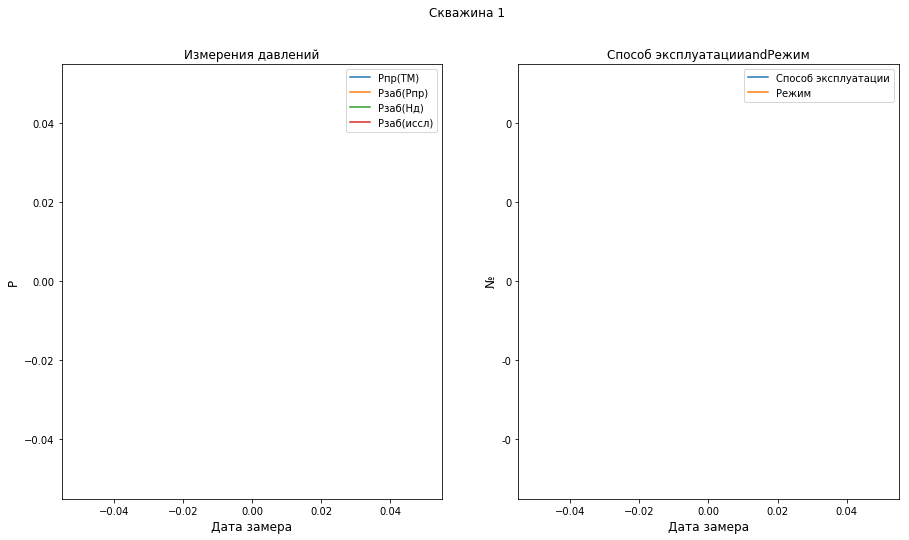

In [42]:
draw_plot('1', all_data[all_data[hole] == '1'][[x1,x2,y1,y2,y3,y4]], 'show')

In [43]:
all_data

,Скважина,Способ эксплуатации,Режим,Рпр(ТМ),Рзаб(Рпр),Рзаб(Нд),Рзаб(иссл)
Дата замера,,,,,,,
2018-01-01,1р,NaN,-1,NaN,NaN,NaN,77.2
2018-01-01,105-1Д,NaN,1,NaN,NaN,NaN,68.0
2018-01-01,1449,NaN,0,NaN,NaN,118.0,178.0
2018-01-01,1442,NaN,-1,NaN,NaN,NaN,159.4
2018-01-01,1441,NaN,-1,NaN,NaN,NaN,66.2
2018-01-01,13,NaN,1,NaN,168.1,136.9,199.0
2018-01-01,147,NaN,-1,NaN,NaN,NaN,58.2
2018-01-01,1435,NaN,-1,NaN,NaN,NaN,45.8
2018-01-01,1451,NaN,1,NaN,NaN,NaN,167.1
